<h1 align="center"><font size="5">Logistic Regression used to Classify UFC Fighters </font></h1>

In this notebook, the classification of UFC fighters into three specific Types (Striker, Grappler and MMA) through use of a Logisitc Regression algorithm is implemented and evaluated.

Import and load the relevant libraries

In [2]:
import pandas as pd #Provides high performance easy to use data structures and operations for manipulating numerical tables.
import pylab as pl #Imports portions of matplotlib and numpy to provide a MATLAB like experience.
import numpy as np #Math Library that allows one to work with N-Dimensional arrays in Python and enables one to do computation efficiently and effectively
import scipy.optimize as opt #Provides several commonly used optimization algorithms.
from sklearn import preprocessing #Contains several common utility functions and tranformer classes.
import matplotlib.pyplot as plt #Provides a MATLAB like plotting function
import seaborn as sns

### The Dataset

This dataset is about UFC fighters. The ufc_fighters_2.csv dataset includes features of 147 fighters who fit into one of three different Types.

In [6]:
ufc=pd.read_csv('ufc_fighters_2.csv')
ufc

,Fighters Name,Weight (lbs),Height (cm),Reach (cm),SLpM,Str.Acc,SApM,Str.Def,Td.Avg,Td.Acc,...,L.KO,KD.Ratio,Str.Stand,Str.Clinch,Str.Ground,Str.Head,Str.Body,Str.Leg,Avg.Fight Time,Type
0,Alistair Overeem,265,193,203.0,3.65,0.73,4.69,0.60,0.60,0.25,...,0.78,0.90,0.50,0.23,0.27,0.50,0.35,0.15,08:47:00,Striker
1,Isreal Adesanya,185,193,203.0,4.47,0.54,2.07,0.69,0.00,0.00,...,0.00,0.88,0.84,0.13,0.03,0.53,0.19,0.28,13:42:00,Striker
2,Khabib Nurmagomedov,155,177,177.0,4.29,0.50,1.70,0.67,5.09,0.45,...,0.00,0.20,0.40,0.04,0.56,0.87,0.08,0.05,13:56:00,Grappler
3,Daniel Cormier,235,180,182.0,3.83,0.52,3.66,0.58,1.93,0.47,...,0.50,0.18,0.50,0.28,0.22,0.72,0.16,0.12,12:34:00,Grappler
4,Jon Jones,205,193,213.0,4.30,0.58,2.22,0.64,1.85,0.44,...,0.00,0.22,0.65,0.17,0.18,0.47,0.25,0.29,15:28:00,MMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Jan Blachowicz,205,188,198.0,3.45,0.49,2.77,0.54,1.16,0.52,...,0.24,0.45,0.71,0.15,0.14,0.66,0.22,0.12,12:01:00,MMA
143,Curtis Blaydes,265,193,203.0,3.71,0.51,2.03,0.55,6.79,0.57,...,1.00,0.17,0.36,0.17,0.47,0.70,0.14,0.16,09:49:00,Grappler
144,Kyle Bochniak,145,170,178.0,2.60,0.32,4.73,0.59,1.17,0.19,...,0.00,0.17,0.90,0.08,0.02,0.66,0.13,0.21,15:00:00,MMA
145,Tim Boetsch,185,183,188.0,2.93,0.51,2.90,0.57,1.45,0.34,...,0.31,0.48,0.63,0.25,0.12,0.57,0.25,0.17,09:02:00,MMA


Data Analysis required that all variables be of float type so string type variables needed to be converted or removed.

In [7]:
ufc=ufc.drop('Fighters Name', axis=1) #Fighters name variable is removed

#Convert the time variable to a float type.
time = pd.DatetimeIndex(ufc['Avg.Fight Time']) 
time.hour+time.minute/60
ufc = ufc.drop('Avg.Fight Time', axis=1)
ufc["Avg Time"]=list(time.hour+time.minute/60)
Type=ufc.pop('Type')
ufc['Type']=Type

#Converts the target variable to a float type 
types={'Grappler':0,'MMA':1,'Striker':2}
ufc['Type']=[types[i] for i in ufc['Type']]
ufc

,Weight (lbs),Height (cm),Reach (cm),SLpM,Str.Acc,SApM,Str.Def,Td.Avg,Td.Acc,Td.Def,...,L.KO,KD.Ratio,Str.Stand,Str.Clinch,Str.Ground,Str.Head,Str.Body,Str.Leg,Avg Time,Type
0,265,193,203.0,3.65,0.73,4.69,0.60,0.60,0.25,0.73,...,0.78,0.90,0.50,0.23,0.27,0.50,0.35,0.15,8.783333,2
1,185,193,203.0,4.47,0.54,2.07,0.69,0.00,0.00,0.85,...,0.00,0.88,0.84,0.13,0.03,0.53,0.19,0.28,13.700000,2
2,155,177,177.0,4.29,0.50,1.70,0.67,5.09,0.45,0.85,...,0.00,0.20,0.40,0.04,0.56,0.87,0.08,0.05,13.933333,0
3,235,180,182.0,3.83,0.52,3.66,0.58,1.93,0.47,0.78,...,0.50,0.18,0.50,0.28,0.22,0.72,0.16,0.12,12.566667,0
4,205,193,213.0,4.30,0.58,2.22,0.64,1.85,0.44,0.95,...,0.00,0.22,0.65,0.17,0.18,0.47,0.25,0.29,15.466667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,205,188,198.0,3.45,0.49,2.77,0.54,1.16,0.52,0.66,...,0.24,0.45,0.71,0.15,0.14,0.66,0.22,0.12,12.016667,1
143,265,193,203.0,3.71,0.51,2.03,0.55,6.79,0.57,0.25,...,1.00,0.17,0.36,0.17,0.47,0.70,0.14,0.16,9.816667,0
144,145,170,178.0,2.60,0.32,4.73,0.59,1.17,0.19,0.63,...,0.00,0.17,0.90,0.08,0.02,0.66,0.13,0.21,15.000000,1
145,185,183,188.0,2.93,0.51,2.90,0.57,1.45,0.34,0.59,...,0.31,0.48,0.63,0.25,0.12,0.57,0.25,0.17,9.033333,1


### Feature Selection

The corr() function from the pandas library is used to highlight how strongly each variable is correlated to one another.

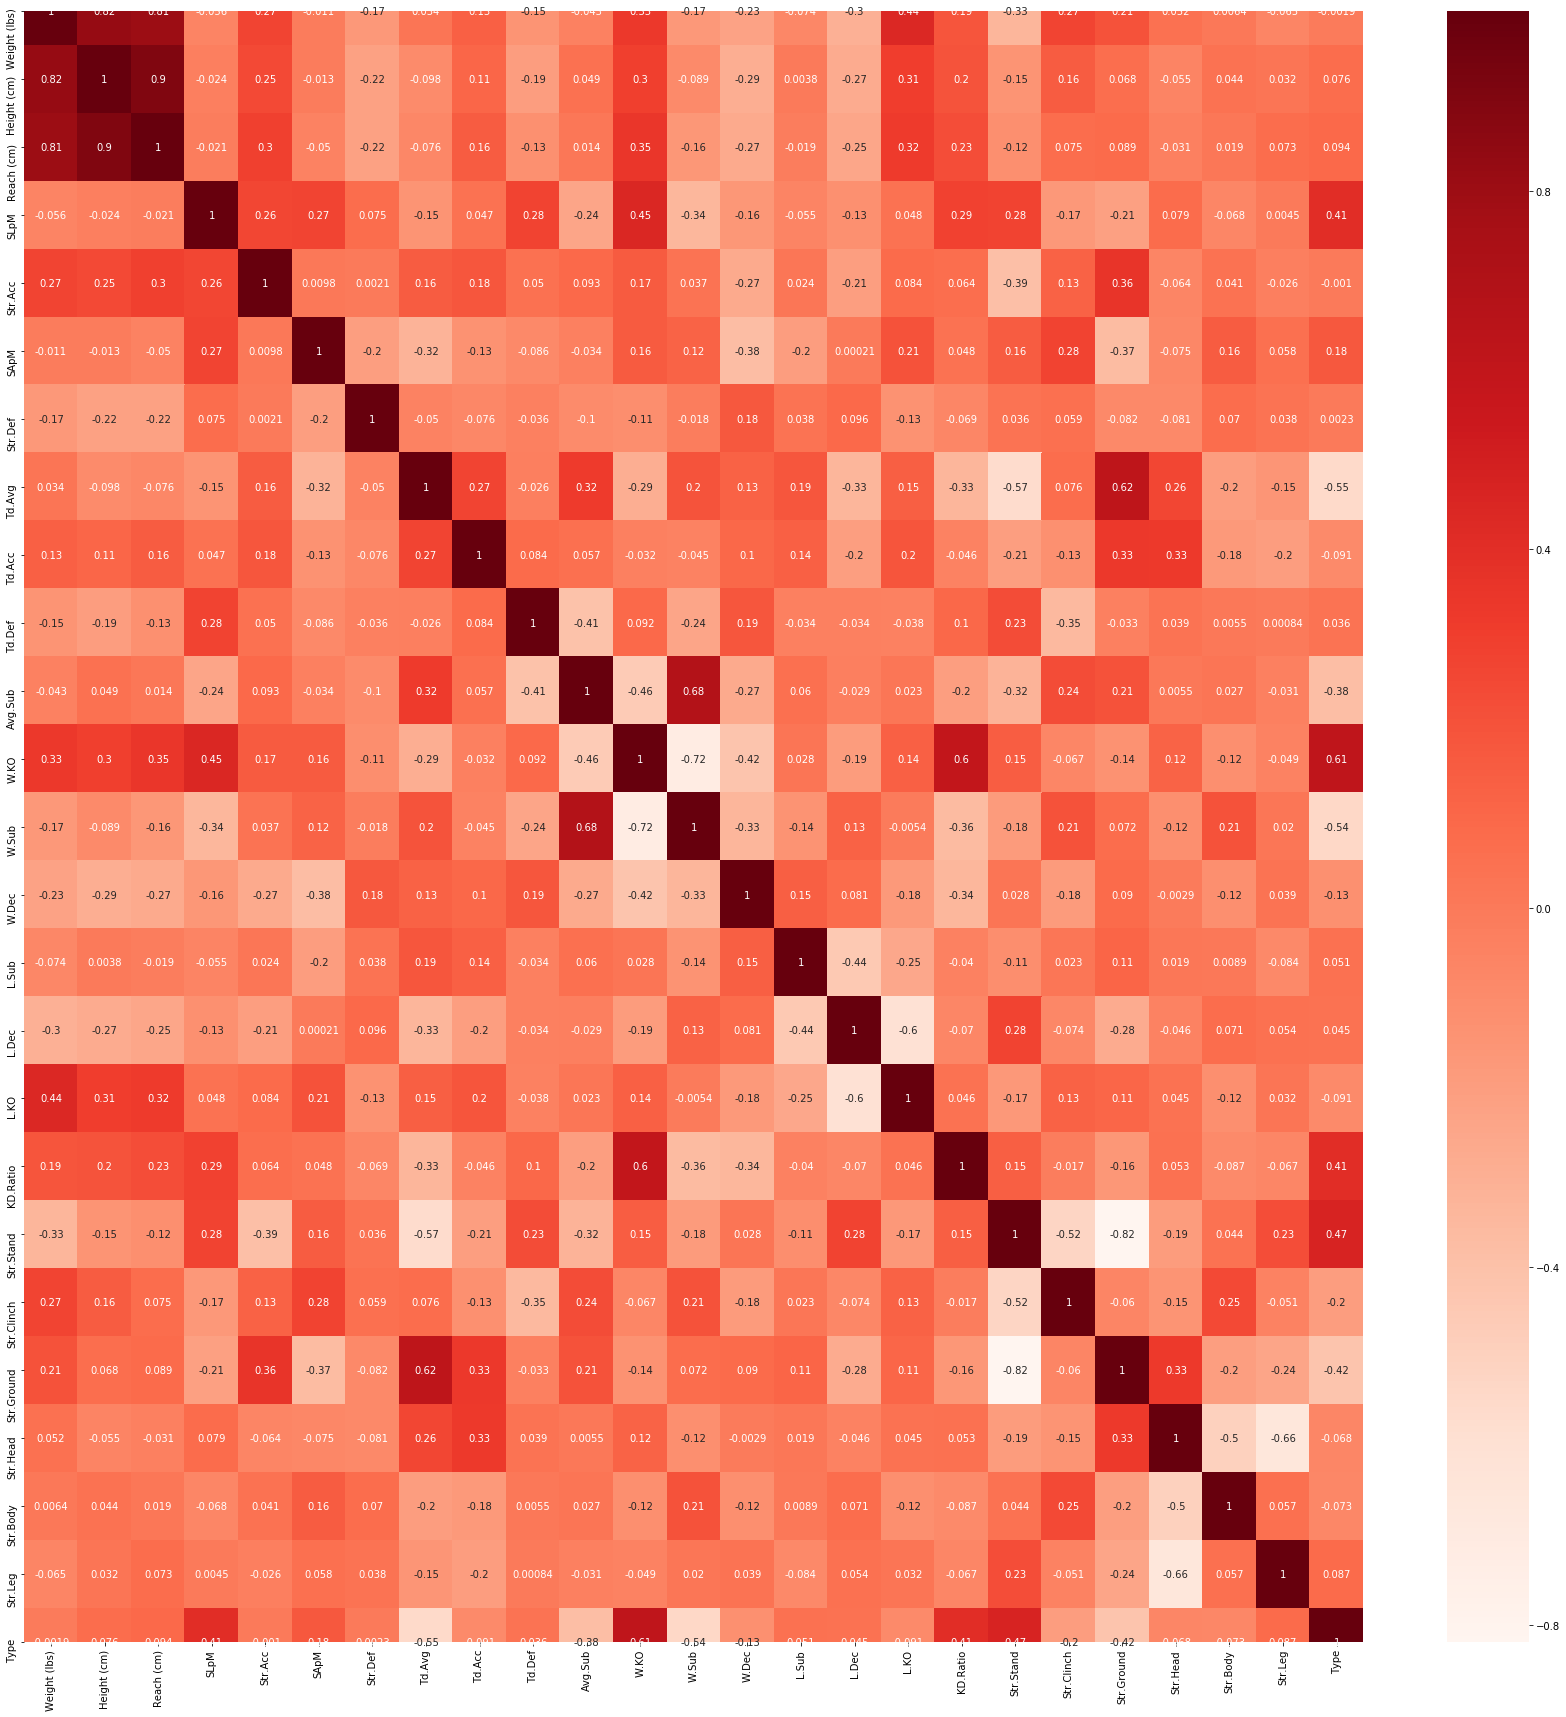

In [470]:
plt.figure(figsize=(30,30))
cor = ufc.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [471]:
print(ufc.shape)
for col in ufc.columns:
    print(col)

(147, 25)
Weight (lbs)
Height (cm)
Reach (cm)
SLpM
Str.Acc
SApM
Str.Def
Td.Avg
Td.Acc
Td.Def
Avg.Sub
W.KO
W.Sub
W.Dec
L.Sub
L.Dec
L.KO
KD.Ratio
Str.Stand
Str.Clinch
Str.Ground
Str.Head
Str.Body
Str.Leg
Type


In [472]:
#Correlation with output variable
cor_target = cor["Type"]
#Selecting highly correlated features
#new_features=cor_target.index.values.tolist() # All features
#new_features=cor_target[cor_target>0.0].index.values.tolist() # All features with correlation greater than 0.0 
#new_features=cor_target[cor_target>0.1].index.values.tolist() #All features with correlation greater than 0.1
#new_features=cor_target[cor_target>0.2].index.values.tolist() #All features with correlation greater than 0.2
#new_features=cor_target[cor_target>0.3].index.values.tolist() #All features with correlation greater than 0.3
new_features=cor_target[cor_target>0.39].index.values.tolist() #All features with correlation greater than 0.4 
#new_features=cor_target[cor_target>0.45].index.values.tolist() #All features with correlation greater than 0.45
print(new_features[0:len(new_features)-1])

['SLpM', 'W.KO', 'KD.Ratio', 'Str.Stand']


In [473]:
X = np.asarray(ufc[new_features[0:len(new_features)-1]])
X[0:6]

array([[3.65, 0.51, 0.9 , 0.5 ],
       [4.47, 0.78, 0.88, 0.84],
       [4.29, 0.31, 0.2 , 0.4 ],
       [3.83, 0.45, 0.18, 0.5 ],
       [4.3 , 0.43, 0.22, 0.65],
       [3.83, 0.31, 0.39, 0.58]])

In [474]:
y = np.asarray(ufc['Type'])
y[0:6]

array([2, 2, 0, 0, 1, 1])

In [475]:
from sklearn import preprocessing # preprocesses the data and converts the categorical variable into dummy/indicator variables
X = preprocessing.MinMaxScaler().fit(X).transform(X)
X.mean(axis=0)

array([0.34, 0.44, 0.13, 0.66])

In [476]:
from sklearn.model_selection import train_test_split #import train test split evaluation metric
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [477]:
from sklearn.linear_model import LogisticRegression #Import Logistic Regression and fit to the X and y training data
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.001, solver='liblinear').fit(X_train,y_train)
LR

/Users/ahmedmasood/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [478]:
yhat = LR.predict(X_test) #predict the test set
print(y_test[0:10])
print(yhat[0:10])

[2 2 0 0 2 2 0 0 1 2]
[1 1 1 1 2 1 1 1 1 1]


In [479]:
yhat_prob = LR.predict_proba(X_test) #returns estimates for all classes ordered by the label of classes. The first column is the probability of class 1 and second colum is probabiliyt of class 0
yhat_prob[0:10]

array([[0.33, 0.33, 0.33],
       [0.33, 0.33, 0.33],
       [0.33, 0.33, 0.33],
       [0.33, 0.33, 0.33],
       [0.33, 0.33, 0.33],
       [0.33, 0.33, 0.33],
       [0.33, 0.33, 0.33],
       [0.33, 0.33, 0.33],
       [0.33, 0.33, 0.33],
       [0.33, 0.33, 0.33]])

In [480]:
from sklearn import metrics #imports metrics to check accuracy of the model.
import matplotlib.pyplot as plt
print("Logistic Regression Accuracy: ", metrics.accuracy_score(y_test, yhat))

Logistic Regression Accuracy:  0.26666666666666666


In [481]:
print(" Logistic Regression Jaccard Similarity score: ", metrics.jaccard_similarity_score(y_test, yhat))

 Logistic Regression Jaccard Similarity score:  0.26666666666666666


/Users/ahmedmasood/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [457]:
#%matplotlib inline #inline allows the backend of plotting functions to be inline with the frontend.
import matplotlib.pyplot as plt #Provides a MATLAB like plotting function
from sklearn.metrics import classification_report, confusion_matrix #Confusion matrix is imported
import itertools
def plot_confusion_matrix(cm, classes, 
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print(confusion_matrix(y_test, yhat, labels=[2,1,0]))
    
    # Compute confusion matrix without normalization
    cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,1,0])
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Striker=2', 'MMA=1','Grappler=0'],normalize= False,  title='Confusion matrix')

In [458]:
print (classification_report(y_test, yhat)) #classification report

from sklearn.metrics import log_loss #Try log loss for evaluationg the output is the probability of customer churn is yes
print("Log Loss:", log_loss(y_test, yhat_prob))

              precision    recall  f1-score   support

           0       0.56      0.83      0.67        18
           1       0.67      0.09      0.16        22
           2       0.42      0.69      0.52        16

    accuracy                           0.50        56
   macro avg       0.55      0.54      0.45        56
weighted avg       0.56      0.50      0.43        56

Log Loss: 1.0833587553042368
